# Model Training Notebook

This notebook is used to setup, clean and train the cost prediction model

An example row in the dataset.csv looks like:
```CSV
"Description","Mileage","Make","Model","ModelYear","Total"
"REPAIR (PLUG) TIRE ON CAR","37032","DODGE","CARAVAN -GRAND CARAVAN","2001","5"
"CHANGE OIL & FILTER,TOP OFF FLUIDS","73475","TOYOTA","CAMRY FWD","1997","232"
```

In [ ]:
%pip install scikit-learn
%pip install scikit-multilearn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install xgboost

## Data Setup

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('dataset.csv', header = 0)

In [77]:
df.head()

,Description,Mileage,Make,Model,ModelYear,Total
0,REPAIR (PLUG) TIRE ON CAR,37032,DODGE,CARAVAN -GRAND CARAVAN,2001,5
1,"CHANGE OIL & FILTER,TOP OFF FLUIDS",73475,TOYOTA,CAMRY FWD,1997,232
2,CHANGE OIL & REMOVE SPOILER,89254,SATURN,S SERIES,1996,22
3,"CHANGE OIL & FILTER,TOP OFF FLUIDS",51470,FORD,RANGER,1999,49
4,"CHANGE OIL & FILTER,TOP OFF FLUIDS",120719,DODGE,NEON,1995,53


In [78]:
df.shape

(52236, 6)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52236 entries, 0 to 52235
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  52235 non-null  object
 1   Mileage      52236 non-null  int64 
 2   Make         52228 non-null  object
 3   Model        52236 non-null  object
 4   ModelYear    52236 non-null  int64 
 5   Total        52236 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.4+ MB


In [80]:
df.describe()

,Mileage,ModelYear,Total
count,5.223600e+04,52236.000000,52236.000000
mean,1.044578e+05,2005.749598,251.646087
std,6.077701e+04,7.327926,369.394214
min,0.000000e+00,1950.000000,-283.000000
25%,6.090675e+04,2001.000000,40.000000
50%,9.848700e+04,2006.000000,113.000000
75%,1.406035e+05,2011.000000,343.000000
max,2.662311e+06,2024.000000,7712.000000


In [81]:
df.isnull().any()

Description     True
Mileage        False
Make            True
Model          False
ModelYear      False
Total          False
dtype: bool

In [82]:
df.Make.unique()

array(['DODGE', 'TOYOTA', 'SATURN', 'FORD', 'NISSAN', 'CHRYSLER', 'BMW',
       'HONDA', 'PONTIAC', 'LEXUS', 'JEEP', 'CHEVROLET', 'VOLKSWAGEN',
       'ACURA', 'PLYMOUTH', 'MITSUBISHI', 'MERCURY', 'INFINITI',
       'LINCOLN', 'MAZDA', 'HYUNDAI', 'GMC LIGHT TRUCK', 'VOLVO',
       'CADILLAC', 'SUBARU', 'MERCEDES', 'AUDI', 'BUICK', 'SAAB', 'ISUZU',
       'OLDSMOBILE', 'SUZUKI', 'LAND ROVER', 'KIA', 'DAEWOO',
       'GMC - LIGHT TRUCK', 'JAGUAR', 'PORSCHE', 'MERCEDES-BENZ',
       'IMPALA', 'TAURUS SE', 'SIENNA LE', 'VOLKSWAGON', 'ROLLS ROYCE',
       'SCION', 'TRAILER', 'ALTIMA 2.5S', 'RX350', 'EDGE LIMITED',
       'MERCADES-BENS', 'NISSAN HD TRUCK', 'CHEVY', 'INTERNATIONAL',
       'PARTS', nan, 'RAM', 'GMC', 'HUMMER', 'TESLA', 'VW', 'MINI',
       'ALFA ROMEO', 'BIG TEX MANUFACTURING', 'GENESIS', 'FIAT', 'RATR'],
      dtype=object)

In [83]:
df.Model.unique()

array(['CARAVAN -GRAND CARAVAN', 'CAMRY FWD', 'S SERIES', 'RANGER',
       'NEON', 'MAXIMA FWD', 'NEW YORKER FWD', 'WINDSTAR', 'EXPLORER 4X4',
       '3 SERIES', 'CIVIC', 'GRAND PRIX FWD', 'ES300',
       'GRAND CHEROKEE 4x4', 'FOCUS', 'LS400', 'BLAZER 4X4 (S-10)',
       'TAURUS', 'ECHO FWD', 'JETTA FWD', 'CL SERIES', 'SENTRA',
       'INTEGRA', 'VOYAGER -GRAND VOYAGER', 'ACCORD', 'ECLIPSE',
       'E150 VAN', 'R 1500 4X4 PICKUP', 'ALTIMA', 'CONTOUR', 'VILLAGER',
       'QX4 4X4', 'TOWN CAR', '200 - 3500 SERIES VAN',
       'F250 - F350 4X4 PICK UP', 'SUBURBAN 4X4', 'MIATA (MX5)', 'ACCENT',
       '626 FWD', 'COROLLA FWD', 'C & K SERIES 1500-3500 4x4',
       'DYNASTY  FWD', 'RANGER 4X4', 'LHS', 'SUNBIRD FWD', 'YUKON 4X4',
       '70 SERIES', 'MUSTANG', 'RL SERIES', 'F150 PICK-UP', 'CORVETTE',
       '40 SERIES', 'LUMINA', 'E250 - E350 VAN', 'DeVILLE FWD',
       'TOWN & COUNTRY', 'TL SERIES', 'LEGACY 4x4', 'ESCALADE 4X4',
       'ML320 4x4', 'PROTEGE', 'BRONCO 4X4', 'MYSTIQUE', 'A4 S

## Data Cleanup

In [84]:
# Remove critical columns that have no value
df = df.dropna(subset=['Description', 'Make', 'Model'])

df.isnull().any()

Description    False
Mileage        False
Make           False
Model          False
ModelYear      False
Total          False
dtype: bool

In [85]:
# Combine duplicate values
df.Make.replace("MERCEDES-BENZ", "MERCEDES", regex = True, inplace = True)
df.Make.replace("MERCEDES BENZ", "MERCEDES", regex = True, inplace = True)
df.Make.replace("MERCADES-BENZ", "MERCEDES", regex = True, inplace = True)
df.Make.replace("MERCADES-BENS", "MERCEDES", regex = True, inplace = True)
df.Make.replace("VW", "VOLKSWAGEN", regex = True, inplace = True)
df.Make.replace("CHEVY", "CHEVROLET", regex = True, inplace = True)
df.Make.replace("GMC LIGHT TRUCK", "GMC", regex = True, inplace = True)
df.Make.replace("GMC - LIGHT TRUCK", "GMC", regex = True, inplace = True)

df.Make.unique()

array(['DODGE', 'TOYOTA', 'SATURN', 'FORD', 'NISSAN', 'CHRYSLER', 'BMW',
       'HONDA', 'PONTIAC', 'LEXUS', 'JEEP', 'CHEVROLET', 'VOLKSWAGEN',
       'ACURA', 'PLYMOUTH', 'MITSUBISHI', 'MERCURY', 'INFINITI',
       'LINCOLN', 'MAZDA', 'HYUNDAI', 'GMC', 'VOLVO', 'CADILLAC',
       'SUBARU', 'MERCEDES', 'AUDI', 'BUICK', 'SAAB', 'ISUZU',
       'OLDSMOBILE', 'SUZUKI', 'LAND ROVER', 'KIA', 'DAEWOO', 'JAGUAR',
       'PORSCHE', 'IMPALA', 'TAURUS SE', 'SIENNA LE', 'VOLKSWAGON',
       'ROLLS ROYCE', 'SCION', 'TRAILER', 'ALTIMA 2.5S', 'RX350',
       'EDGE LIMITED', 'NISSAN HD TRUCK', 'INTERNATIONAL', 'PARTS', 'RAM',
       'HUMMER', 'TESLA', 'MINI', 'ALFA ROMEO', 'BIG TEX MANUFACTURING',
       'GENESIS', 'FIAT', 'RATR'], dtype=object)

In [86]:
# Drop outliers
df.drop(df[(df.Mileage > 550000) | (df.Mileage <= 0)].index, inplace = True)

# Drop default model year
df.drop(df[df.ModelYear <= 1950].index, inplace = True)

# Drop invalid manufacturers
df.drop(df[df.Make == "SIENNA LE"].index, inplace = True)
df.drop(df[df.Make == "TAURUS SE"].index, inplace = True)
df.drop(df[df.Make == "ALTIMA 2.5S"].index, inplace = True)
df.drop(df[df.Make == "RX350"].index, inplace = True)

# Drop invalid prices
df.drop(df[df.Total < 0].index, inplace = True)

In [87]:
df.shape

(50744, 6)

## Dataset Visualization

In [88]:
import seaborn as sns

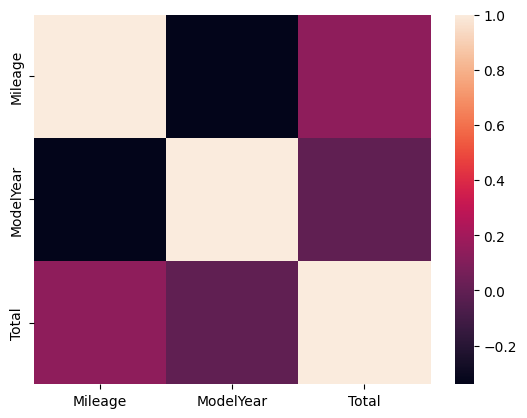

In [89]:
sns.heatmap(df.corr(numeric_only = True));

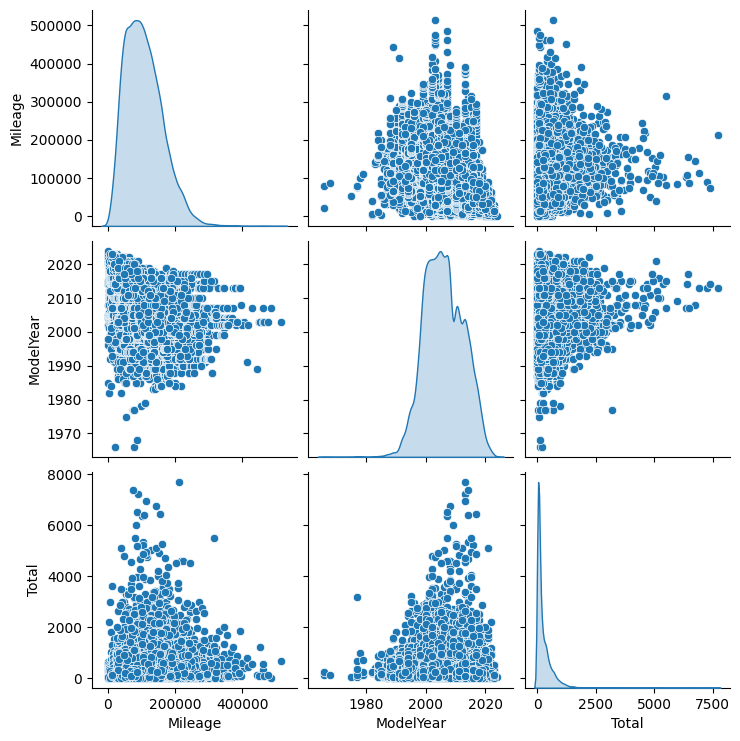

In [90]:
sns.pairplot(df, diag_kind = 'kde');

## Building the Model

### Model Training

The model is designed to predict the cost of a repair based on the ticket description, make, model, and model year of the vehicle. 

- X = Predictors
- Y = Target

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
model_df = df

X = model_df[["Description", "ModelYear", "Make", "Model"]]
y = model_df["Total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), "Description"),
        ('onehot', OneHotEncoder(handle_unknown="ignore"), ["Make", "Model"]),
        ('scaler', StandardScaler(), ['ModelYear'])
    ],
    remainder="drop"
)

#### Model 1 - Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 68335.74234265699


#### Model 2 - Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression


model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

/home/amattu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Squared Error: 171639.68208690512


#### Model 3 - Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit model
model3.fit(X_train, y_train)

# Make predictions
predictions = model3.predict(X_test)

# Measure quality
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 60887.37793223809


#### Model 4 - XGBRegressor

In [97]:
from xgboost import XGBRegressor

model4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Fit model
model4.fit(X_train, y_train)

# Make predictions
predictions = model4.predict(X_test)

# Measure quality
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 60133.69083529899


###  Create Model File

Export the selected model and the vectorizer to a file for use in the API.

In [100]:
import pickle

pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

### Model Usage

Demo of how to use the model to predict the cost of a service.

In [124]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    file.close()

# Make a prediction
prediction = pickle_model.predict(pd.DataFrame([{
    "Description": "4 TIRES, FEA",
    "ModelYear": 2014,
    "Make": "TOYOTA",
    "Model": "PRIUS"
}]))

print("Estimated price for that repair: $%.2f" % prediction)

Estimated price for that repair: $655.45
